# Homework 3: Reproducibility in Climate Studies

* **Statistics 159/259, Spring 2022**
* **Due 03/23/2023, 23:59PM PT**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* This assignment is worth a maximum of **50 points**.
* Assignment type: **group homework assignment** (Check on Ed Discussion about group's assignments).

## 2. The West Coast Heat Wave

In 2016 [Dr. Chelle Gentemann](https://cgentemann.github.io) and collaborators published a [paper](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL071039) on the heat wave in the ocean off the California coast

The analysis was then performed using Matlab to process scientific data. To make Figure 1, here are the following steps:
- Download 4 TB of data from NASA PO.DAAC data archive via FTP
- Go through each day of data and subset to the West Coast Region to reduce size and save each subsetted day
- Go through 2002-2012 and create a daily climatology and save all 365 days of the climatology
- Go through each day of data and calculate the anomaly and save each day's anomaly

This whole process took about 1-2 month. 
Below we will do this using MUR SST data on AWS Open Data Program in a few minutes using Python.

### Question 4 [10 points]

Reproduce Figure 1 in the paper. When doing that, try to slice data using `xarray` in the most clear and reproducible way (for example, don't use indices to access data objects like we did in the example above).

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [9]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

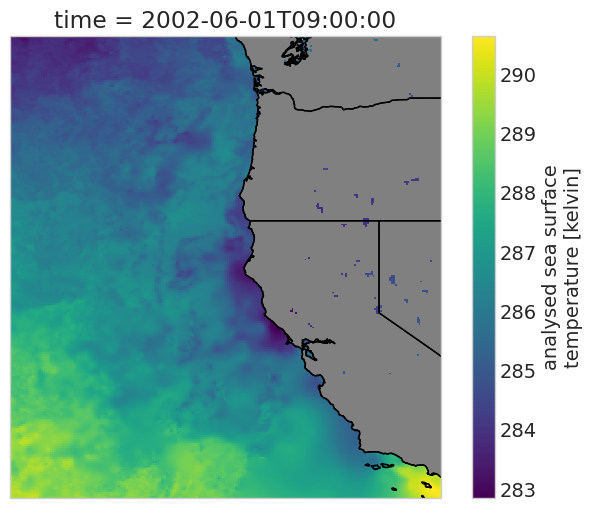

In [10]:
ds.analysed_sst[0, :, :].plot()

# Plot on a map
ax = plt.subplot(projection=crs)
ds.analysed_sst[0, :, :].plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

In [11]:
##Question 4 [10 points]
##Reproduce Figure 1 in the paper. When doing that, try to slice data using xarray in the most clear and reproducible way (for example, don't use indices to access data objects like we did in the example above).

In [12]:
sst = ds['analysed_sst']
sst_celcius = sst-273.15

In [13]:
# Calculate the average SST for each month (1-12) before 2014
prev_avg = sst_celcius.sel(time=slice(None, '2013-12-31')).groupby('time.month').mean(dim='time')
prev_avg

<xarray.DataArray 'analysed_sst' (month: 12, lat: 251, lon: 234)>
array([[[16.46614  , 16.44566  , 16.415243 , ..., 15.002039 ,
         15.008706 , 15.01729  ],
        [16.440947 , 16.417645 , 16.390535 , ..., 14.972851 ,
         14.974403 , 14.980535 ],
        [16.424637 , 16.405144 , 16.3842   , ..., 14.950639 ,
         14.936312 , 14.936312 ],
        ...,
        [ 8.40738  ,  8.421719 ,  8.435046 , ...,        nan,
                nan,        nan],
        [ 8.3786125,  8.385768 ,  8.392421 , ...,        nan,
                nan,        nan],
        [ 8.348858 ,  8.352694 ,  8.362832 , ...,        nan,
                nan,        nan]],

       [[15.856224 , 15.840762 , 15.835179 , ..., 14.825084 ,
         14.82418  , 14.837322 ],
        [15.824301 , 15.819081 , 15.806444 , ..., 14.816504 ,
         14.815704 , 14.816525 ],
        [15.800384 , 15.801318 , 15.7910595, ..., 14.795903 ,
         14.797687 , 14.805717 ],
...
        [11.497693 , 11.509039 , 11.524448 , ...,        nan,
                nan,        nan],
        [11.473504 , 11.486358 , 11.506748 , ...,        nan,
                nan,        nan],
        [11.452955 , 11.473267 , 11.499473 , ...,        nan,
                nan,        nan]],

       [[17.647331 , 17.62416  , 17.602985 , ..., 15.810488 ,
         15.817965 , 15.82877  ],
        [17.62465  , 17.596252 , 17.572224 , ..., 15.817815 ,
         15.826179 , 15.826525 ],
        [17.607218 , 17.575672 , 17.551281 , ..., 15.795009 ,
         15.814289 , 15.812792 ],
        ...,
        [ 9.661085 ,  9.673196 ,  9.678243 , ...,        nan,
                nan,        nan],
        [ 9.620982 ,  9.641186 ,  9.656785 , ...,        nan,
                nan,        nan],
        [ 9.586634 ,  9.609692 ,  9.636479 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon      (lon) float32 -132.0 -131.9 -131.9 -131.8 ... -118.1 -118.1 -118.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [14]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

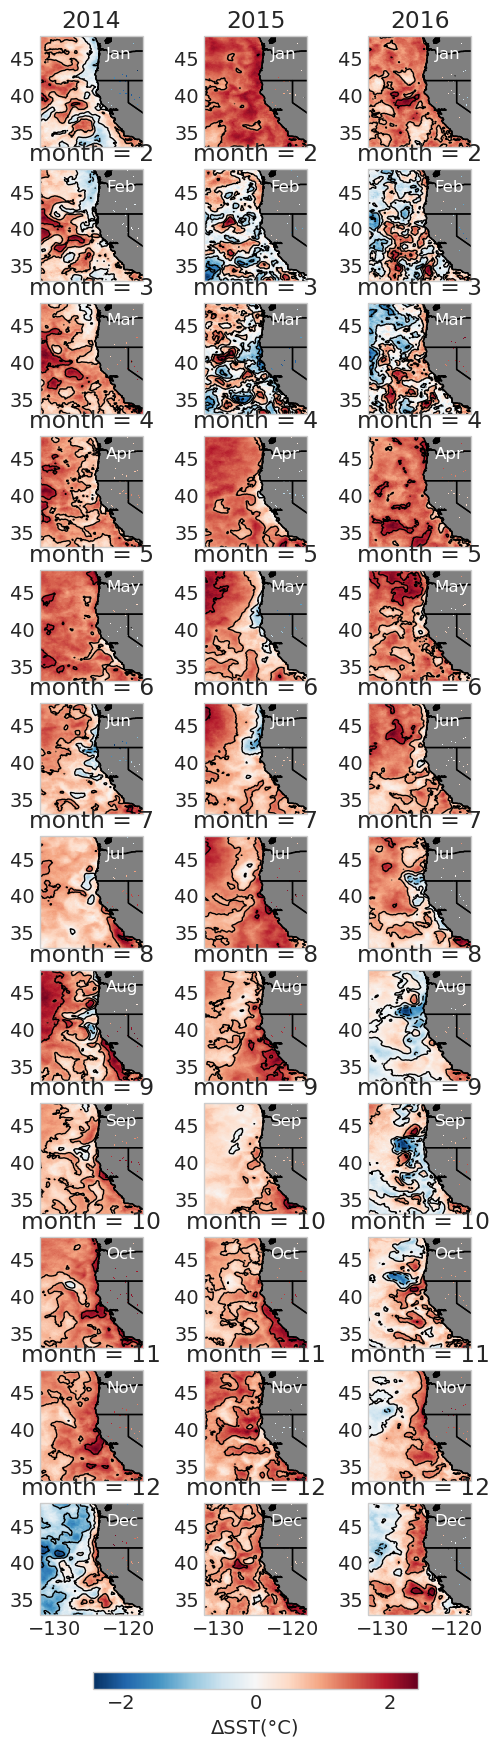

In [15]:
fig, axs = plt.subplots(figsize=(6, 25), nrows=12, ncols=3, subplot_kw=dict(projection=crs))

for col in range(3):
    for row in range(12):
        temp = sst_celcius.sel(time="{}-{}".format(col + 2014, row + 1)).mean(dim='time')
        prev = prev_avg.sel(month=row + 1)
        dev = temp - prev

        cmap = dev.plot(ax=axs[row, col], transform=ccrs.PlateCarree(), add_colorbar=False, cmap='RdBu_r')
        dev.plot.contour(ax=axs[row, col], colors='black', linewidths=1)
        axs[row, col].set_yticks(range(35, 46, 5))
        axs[row, col].set_ylabel('')

        if row == 0:
            axs[row, col].set_title(str(col + 2014))

        if row == 11:
            axs[row, col].set_xticks(range(-130, -119, 10))
            axs[row, col].set_xlabel('')

        axs[row, col].text(-123, 45, month[row], fontsize=12, color='white')
        axs[row, col].coastlines("10m", color="k")
        axs[row, col].add_feature(cfeature.LAND, color="grey")
        axs[row, col].add_feature(cfeature.STATES.with_scale("10m"))
        
# create a colorbar
cbar = plt.colorbar(cmap, ax=axs, location='bottom', shrink=0.7, pad=0.03)
cbar.set_label('ΔSST(°C)')
cbar.set_ticks(range(-2,3,2))

plt.show()